### 2022 KAKAO TECH INTERNSHIP > [성격 유형 검사하기](https://school.programmers.co.kr/learn/courses/30/lessons/118666)


- 문제 자체의 난이도는 어렵지 않으며, 실행속도와 가독성을 위해 하드코딩을 이용

In [ ]:
def solution(survey, choices):
    personalities = ['R', 'T', 'C', 'F', 'J', 'M', 'A', 'N']
    results = {p:0 for p in personalities}
    for s, c in zip(survey, choices):
        if c == 4:
            continue
        elif c < 4:
            results[s[0]] += 4-c
        else :
            results[s[1]] += c-4
    
    answer = ''
    for i in range(4):
        p1, p2 = personalities[i*2], personalities[i*2+1]
        r1, r2 = results[p1], results[p2]
        if r1 >= r2:
            answer += p1
        else :
            answer += p2
    
    return answer

### 2019 카카오 개발자 겨울 인턴십 > [크레인 인형뽑기 게임](https://school.programmers.co.kr/learn/courses/30/lessons/64061)

In [49]:
def solution(board, moves):
    board = [list(row) for row in zip(*board[::-1])]
    pocket = []
    answer = 0
    for move in moves:
        target = 0        
        while not target:
            if not board[move-1]:
                break
            target = board[move-1].pop()
        if target == 0:
            continue
        
        print(pocket, target)
        if not pocket :
            pocket.append(target)
            before = target
        elif before == target:
            pocket.pop()
            answer += 2
            before = pocket[-1] if pocket else 0
        else :
            pocket.append(target)
            before = target
    return answer

In [50]:
board = [[0,0,0,0,0],[0,0,1,0,3],[0,2,5,0,1],[4,2,4,4,2],[3,5,1,3,1]]
moves = [1,5,3,5,1,2,1,4]
solution(board, moves)

[] 4
[4] 3
[4, 3] 1
[4, 3, 1] 1
[4, 3] 3
[4] 2
[4, 2] 4


4

In [51]:
board = [[0, 0, 0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 2], [5, 5, 5, 5, 5], [2, 2, 2, 2, 2]]
moves = [5, 1, 2, 3, 4, 1]
solution(board, moves)

[] 2
[2] 5
[2, 5] 5
[2] 5
[2, 5] 5
[2] 2


6

### [햄버거 만들기](https://school.programmers.co.kr/learn/courses/30/lessons/133502)

- 재료가 하나씩 들어오는 과정을 구현하고, 이에 따라 각 과정을 대체하는 코드를 통해 체크 -> 큰 사이즈의 ingredient가 들어왔을 때, 시간초과 문제 발생 -> 더 효율적인 방법 필요 ex) sliding window

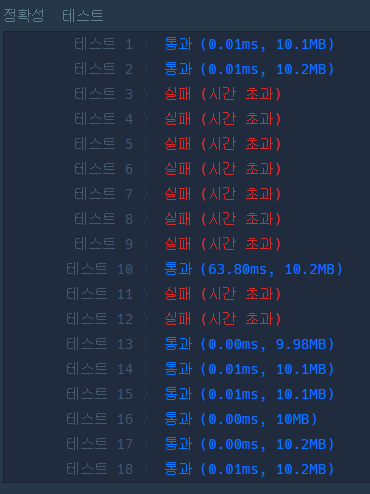

In [66]:
def solution(ingredient):
    if len(ingredient) < 4:
        return 0
    target = ''
    pattern = '1231'
    answer = 0 
    ingredient.reverse()
    while ingredient:
        t = ingredient.pop()
        target += str(t)
        before = target
        target = target.replace(pattern, '')
        if target != before:
            answer += 1
            before = target
    return answer
        

- sliding window를 이용해 구현

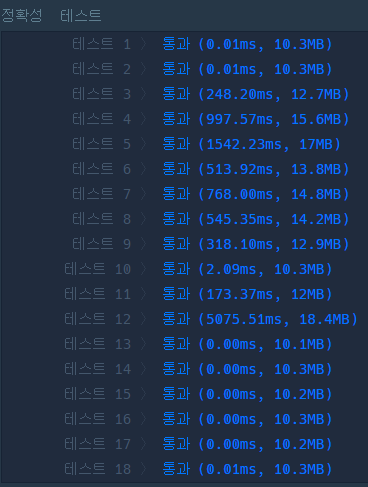

In [ ]:
def solution(ingredient):
    target_pattern = [1, 2, 3, 1]
    count = 0
    i = 0
    
    # ingredient 배열을 순회
    while i <= len(ingredient) - 4:
        # 현재 위치에서 시작하는 길이 4의 슬라이스가 타겟 패턴과 일치하는지 검사
        if ingredient[i:i+4] == target_pattern:
            count += 1
            # 패턴에 일치하면 해당 부분을 리스트에서 제거
            del ingredient[i:i+4]
            # 제거 후 인덱스를 조정하지 않고 같은 위치에서 다시 검사 시작
            i = max(0, i - 3)  # i - 3으로 조정하여 연결된 부분이 새로운 패턴을 형성할 수 있는지 검사
        else:
            i += 1  # 일치하지 않으면 한 칸씩 이동
    
    return count

In [67]:
ingredient = [2, 1, 1, 2, 3, 1, 2, 3, 1]
solution(ingredient)

2

In [68]:
ingredient = [1, 2, 1, 2, 3, 1, 3, 1, 2, 3, 1, 1]
solution(ingredient)

2

### 2020 카카오 인턴십 > [키패드 누르기](https://school.programmers.co.kr/learn/courses/30/lessons/67256)


In [2]:
def solution(numbers, hand):
    hands = {'L':'*', 'R':'#'}
    position = {1:(0,0), 2:(0,1), 3:(0,2), \
                4:(1,0), 5:(1,1), 6:(1,2), \
                7:(2,0), 8:(2,1), 9:(2,2), \
                '*':(3,0), 0:(3,1), '#':(3,2)}
    
    answer = ''
    hand = 'R' if hand == 'right' else 'L'
    for number in numbers:
        if number in [1,4,7]:
            answer += 'L'
            hands['L'] = number
        elif number in [3,6,9]:
            answer += 'R'
            hands['R'] = number
        else :
            number_idx = position[number]
            left_idx = position[hands['L']]
            right_idx = position[hands['R']]
            left_distance = sum([abs(x-y) for x, y in zip(number_idx, left_idx)])
            right_distance = sum([abs(x-y) for x, y in zip(number_idx, right_idx)])
            if left_distance == right_distance:
                answer += hand
                hands[hand] = number
            elif left_distance < right_distance:
                answer += 'L'
                hands['L'] = number
            else :
                answer += 'R'
                hands['R'] = number                       
    
    return answer

### [최빈값 구하기](https://school.programmers.co.kr/learn/courses/30/lessons/120812#qna)

- 질의응답 받아주기

In [4]:
def solution(array):
    unique_values = list(set(array))
    if len(unique_values) == 1:
        return unique_values[0]
    cnt = [(x, array.count(x)) for x in unique_values]
    cnt = sorted(cnt, key=lambda x : x[1], reverse=True)
    if cnt[0][1] == cnt[1][1]:
        return -1
    else :
        return cnt[0][0]

In [14]:
array = [1,1,1,2,2,3]
solution(array)

3

### [두 원 사이의 정수 쌍](https://school.programmers.co.kr/learn/courses/30/lessons/181187)

- 원점까지의 거리를 이용해 반지름 길이 이용 -> 시간초과

In [17]:
def solution(r1, r2):
    r2_square = [x for x in range(-r2, r2+1)]
    answer = 0
    for i in r2_square:
        for j in r2_square:
            dist= (i**2 + j**2)**(1/2)
            if dist < r1 or dist > r2:
                continue
            answer += 1
    return answer
    

- 원의 대칭성을 고려해 한 사분면만 계산 -> 여전히 시간초과

In [ ]:
def solution(r1, r2):
    r1_square = r1 * r1
    r2_square = r2 * r2
    answer = 0
    
    for i in range(r2 + 1):
        for j in range(r2 + 1):
            dist_square = i**2 + j**2
            if r1_square <= dist_square <= r2_square:
                if i == 0 or j == 0:  # 축 위의 점은 2배로 계산
                    answer += 2
                else:
                    answer += 4

    if r1 == 0:  # 원점 자체를 처리
        answer += 1
    
    return answer

- 8분면만 계산 -> 여전히 시간초과

In [34]:
def solution(r1, r2):
    if r1 == r2:
        return 4
    
    r1_square = r1**2
    r2_square = r2**2
    answer = 0
    for i in range(r2+1):
        for j in range(r2+1):
            if j > i : # 8분면만 계산
                continue
            dist = i**2 + j**2
            if r1_square <= dist <= r2_square:
                if i == j or j == 0:
                    print(f'scout 01: {i, j}')
                    answer += 4
                else :
                    print(f'scout 02: {i, j}')
                    answer += 8
    return answer

- math 라이브러리를 이용 + 코드 수정

In [ ]:
from math import ceil, floor, sqrt
def solution(r1, r2):
    answer = 0
    for i in range(1,r2+1):
        if i  < r1:
            answer += (floor(sqrt(r2*r2-i*i)) - ceil(sqrt(r1*r1-i*i))+1)
        else:
            answer += (floor(sqrt(r2*r2-i*i))+1)
    answer *=4
    return answer

In [35]:
r1 = 1
r2 = 1
solution(r1, r2)

4

In [38]:
from math import ceil, floor, sqrt
floor(sqrt(r2*r2-i*i)) - ceil(sqrt(r1*r1-i*i))+1

NameError: name 'i' is not defined

In [36]:
r1 = 2
r2 = 3
solution(r1, r2)

scout 01: (2, 0)
scout 02: (2, 1)
scout 01: (2, 2)
scout 01: (3, 0)


20

In [21]:
r1 = 2
r2 = 3
solution(r1, r2)

20

In [22]:
r1 = 2
r2 = 4
solution(r1, r2)

40

In [23]:
r1 = 3
r2 = 5
solution(r1, r2)

56

### [특정 형질을 가지는 대장균 찾기](https://school.programmers.co.kr/learn/courses/30/lessons/301646)
- mysql 문제
- mysql에서 비트연산하는 방법

In [ ]:
"""
SELECT COUNT(DISTINCT ID) AS COUNT
FROM ECOLI_DATA
WHERE (GENOTYPE & 2 = 0) AND ((GENOTYPE & 1) = 1 OR (GENOTYPE & 4) = 4);
"""

: 

### 탐욕법(Greedy) > [체육복](https://school.programmers.co.kr/learn/courses/30/lessons/42862?language=python3)

In [14]:
def solution(n, lost, reserve):
    # 여벌 체육복을 가진 학생이 도난당한 경우를 제거
    reserve_set = set(reserve) - set(lost)
    lost_set = set(lost) - set(reserve)

    answer = n - len(lost_set)  # 처음에는 모든 학생이 수업을 들을 수 있다고 가정

    for student in sorted(lost_set):
        # 바로 앞 번호 학생에게 체육복을 빌릴 수 있는지 확인
        if student - 1 in reserve_set:
            reserve_set.remove(student - 1)
            answer += 1
        # 바로 뒷 번호 학생에게 체육복을 빌릴 수 있는지 확인
        elif student + 1 in reserve_set:
            reserve_set.remove(student + 1)
            answer += 1

    return answer

In [15]:
n = 5
lost = [2,4]
reserve = [1,3,5]
solution(n, lost, reserve)

5